In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('appliance_energy.csv')
df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


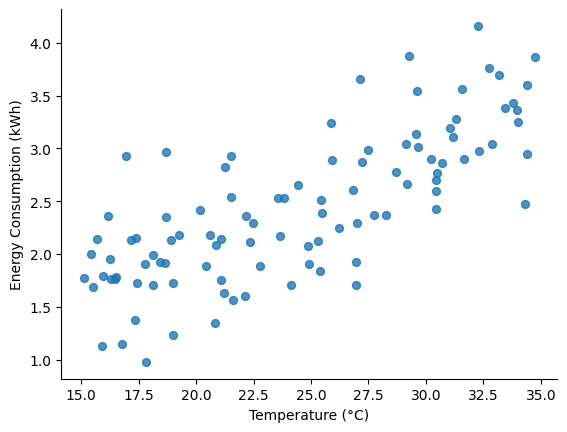

In [7]:
#@title Temperature (°C) vs Energy Consumption (kWh)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature (°C)', y='Energy Consumption (kWh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [10]:
#check for missing values
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [14]:
#'Temperature (°C)' is the independent variable and 'Energy Consumption (kWh)' is the dependent variable
#  X (independent variable)
x = df[['Temperature (°C)']]
#  y (dependent variable)
y = df['Energy Consumption (kWh)']

In [15]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [17]:
#create a linear regression model
model = LinearRegression()
#train the model
model.fit(x_train,y_train)

LinearRegression()

In [18]:
print("Slope: ", model.coef_)
print("y-intercept: ", model.intercept_)

Slope:  [0.08996618]
y-intercept:  0.22196391661907633


In [21]:
print(model.coef_*28.25 + model.intercept_)

[2.76350858]


In [20]:
2.25-2.29

-0.040000000000000036

In [22]:
#make predictions on test set
y_pred = model.predict(x_test)

In [26]:
#mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculate R-Squared value
r2=r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")


Mean Squared Error: 0.16342487842925055
R-Squared: 0.6119478445218713


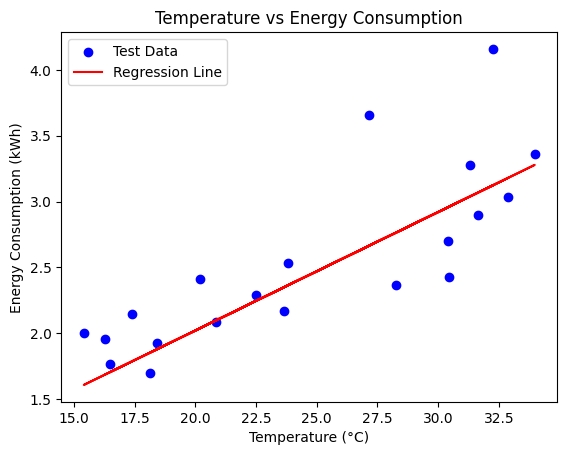

In [27]:
plt.scatter(x_test, y_test, color ='blue', label='Test Data') #actual data
plt.plot(x_test, y_pred, color='red', label='Regression Line') # predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Temperature vs Energy Consumption')
plt.legend()
plt.show()

In [28]:
import joblib
#save the model to a file
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [33]:
temp = np.array([[22.49]])

In [34]:
# energy prediction
prediction = model.predict(temp)
print("Predicted energy consumption:", prediction)

Predicted energy consumption: [2.24530337]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
